In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("./WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:

column_to_drop = ['EmployeeCount','Over18','StandardHours','EmployeeNumber']
df = df.drop(columns=column_to_drop,axis=1)

In [31]:
df["YearsSinceLastPromotion"].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14])

In [32]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [22]:
corelation = df[['Age','Attrition']].corr()

<Axes: >

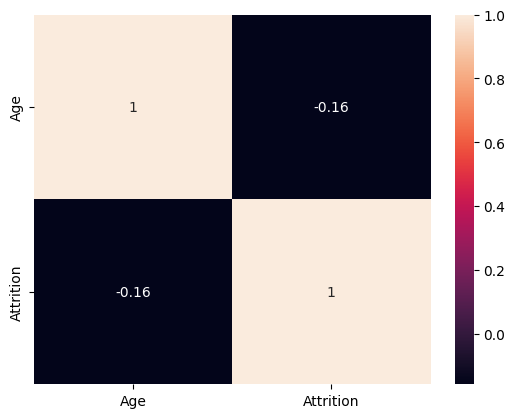

In [23]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

<Axes: xlabel='Age', ylabel='TotalWorkingYears'>

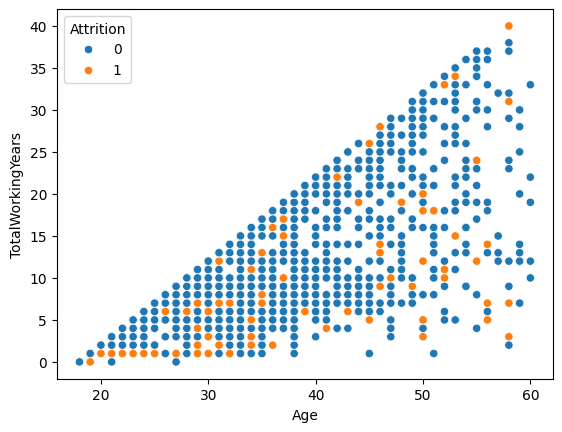

In [24]:
sns.scatterplot(data=df,x='Age',y='TotalWorkingYears',hue='Attrition')

In [25]:
columns = df.columns
columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')

In [26]:
df["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

### People who are leaving:
* age group of 25 to 35
* daily rate 200 to 600 
* In R&D
* With Bachelor
* Job Level
* Job Role
* Montly Income  -- Satisfaction


In [26]:
# for col in columns:
#     sns.displot(x=col,data=df,hue="Attrition")
#     plt.show()

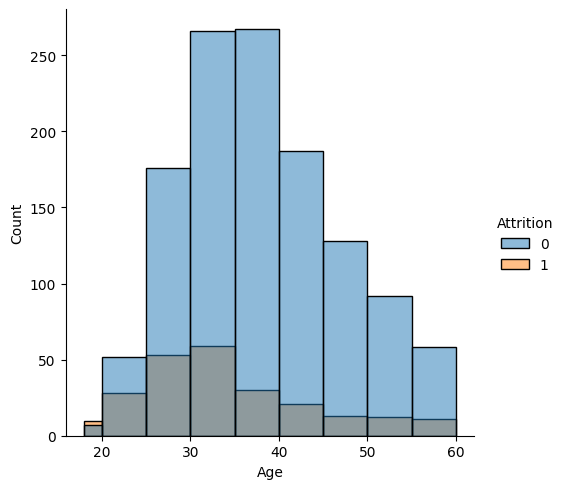

In [14]:
sns.displot(x="Age",data=df,hue="Attrition",bins=[18,20,25,30,35,40,45,50,55,60])

# People between age 30,35 are leving company

In [64]:
df["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

## Model Building

### Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['Attrition', 'Gender', 'OverTime']
encoder = LabelEncoder()
for col in binary_cols:
    df[col] = encoder.fit_transform(df[col])

df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)


In [34]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,1,61,2,2,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,...,False,True,False,False,False,False,False,False,True,False


In [35]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
            'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [93]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [94]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)


from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)


# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Create synthetic samples
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Alternatively, use undersampling
# undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
# X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)


In [95]:
y_resampled.value_counts()

Attrition
0    380
1    190
Name: count, dtype: int64

In [106]:
df.to_csv("processed_data.csv", index=False)


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier

In [ ]:
model = LogisticRegression(random_state=42)
# model.fit(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_pred_log_reg = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Accuracy: 0.826530612244898
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       247
           1       0.47      0.60      0.52        47

    accuracy                           0.83       294
   macro avg       0.69      0.73      0.71       294
weighted avg       0.85      0.83      0.83       294



In [ ]:
model = DecisionTreeClassifier(max_depth=8, random_state=42)
# model.fit(X_train, y_train)
model.fit(X_resampled, y_resampled)
y_pred_des_tree = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_des_tree))
print(classification_report(y_test, y_pred_des_tree))

Accuracy: 0.6904761904761905
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       247
           1       0.22      0.36      0.27        47

    accuracy                           0.69       294
   macro avg       0.54      0.56      0.54       294
weighted avg       0.76      0.69      0.72       294



In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)
# model.fit(X_train, y_train)
y_pred_rfc = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

Accuracy: 0.8197278911564626
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       247
           1       0.43      0.40      0.42        47

    accuracy                           0.82       294
   macro avg       0.66      0.65      0.66       294
weighted avg       0.82      0.82      0.82       294



In [ ]:
model = SVC(kernel='rbf', probability=True, random_state=42)
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.8469387755102041
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.54      0.32      0.40        47

    accuracy                           0.85       294
   macro avg       0.71      0.63      0.66       294
weighted avg       0.82      0.85      0.83       294



In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {score.mean():.4f}")


Logistic Regression: 0.8748
Decision Tree: 0.8530
Random Forest: 0.9321
SVM: 0.9215


In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred_xgbc = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgbc))
print(classification_report(y_test, y_pred_xgbc))

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:24:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8605442176870748
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.67      0.26      0.37        47

    accuracy                           0.86       294
   macro avg       0.77      0.62      0.65       294
weighted avg       0.84      0.86      0.83       294



In [ ]:
lgbm = LGBMClassifier(class_weight="balanced", random_state=42)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

print(classification_report(y_test,y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1156
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.59      0.40      0.48        47

    accuracy                           0.86       294
   macro avg       0.74      0.68      0.70       294
weighted avg       0.85      0.86      0.85       294



In [ ]:
catboost = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', random_state=42, verbose=0)
catboost.fit(X_train, y_train)

y_pred = catboost.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.69      0.19      0.30        47

    accuracy                           0.86       294
   macro avg       0.78      0.59      0.61       294
weighted avg       0.84      0.86      0.82       294



In [ ]:
from sklearn.ensemble import VotingClassifier

# Define base models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, random_state=42),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)  # Enable probability for VotingClassifier
}

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='hard'  # Hard voting (majority rule)
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Ensemble Model Accuracy: {accuracy:.4f}")

Ensemble Model Accuracy: 0.8367


In [141]:
result_dict = {
    "model": [],
    "0_precision": [],
    "0_recall": [],
    "0_f1": [],
    "1_precision": [],
    "1_recall": [],
    "1_f1": [],
    "accuracy": []
}

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGB Classifier" : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LGBM Classifier" : LGBMClassifier(class_weight="balanced", random_state=42),
    "Cat Boost Classifier" : CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', random_state=42, verbose=0)
}

In [142]:
for Model_Name, Model in models.items():
    print(f"Training {Model_Name}...")
    Model.fit(X_resampled, y_resampled)
    y_pred = Model.predict(X_test)

    # Get classification report as a dictionary
    report_dict = classification_report(y_test, y_pred, output_dict=True)  # Renamed variable

    # Append results
    result_dict["model"].append(Model_Name)
    result_dict["0_precision"].append(report_dict["0"]["precision"])
    result_dict["0_recall"].append(report_dict["0"]["recall"])
    result_dict["0_f1"].append(report_dict["0"]["f1-score"])
    result_dict["1_precision"].append(report_dict["1"]["precision"])
    result_dict["1_recall"].append(report_dict["1"]["recall"])
    result_dict["1_f1"].append(report_dict["1"]["f1-score"])
    result_dict["accuracy"].append(accuracy_score(y_test, y_pred))

    print(f"{Model_Name} evaluation completed.\n")

Training Logistic Regression...
Logistic Regression evaluation completed.

Training Decision Tree...
Decision Tree evaluation completed.

Training Random Forest...
Random Forest evaluation completed.

Training SVM...
SVM evaluation completed.

Training XGB Classifier...
XGB Classifier evaluation completed.

Training LGBM Classifier...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:31:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LGBM Classifier evaluation completed.

Training Cat Boost Classifier...
Cat Boost Classifier evaluation completed.



In [144]:
Result_Dataframe = pd.DataFrame(result_dict)
Result_Dataframe.head(10)

,model,0_precision,0_recall,0_f1,1_precision,1_recall,1_f1,accuracy
0,Logistic Regression,0.918803,0.870445,0.893971,0.466667,0.595745,0.523364,0.826531
1,Decision Tree,0.861111,0.753036,0.803456,0.217949,0.361702,0.272000,0.690476
2,Random Forest,0.888000,0.898785,0.893360,0.431818,0.404255,0.417582,0.819728
3,SVM,0.897119,0.882591,0.889796,0.431373,0.468085,0.448980,0.816327
4,XGB Classifier,0.902655,0.825911,0.862579,0.367647,0.531915,0.434783,0.778912
5,LGBM Classifier,0.907895,0.838057,0.871579,0.393939,0.553191,0.460177,0.792517
6,Cat Boost Classifier,0.906780,0.866397,0.886128,0.431034,0.531915,0.476190,0.812925


In [145]:
Result_Dataframe.describe()

,0_precision,0_recall,0_f1,1_precision,1_recall,1_f1,accuracy
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.897480,0.847889,0.871553,0.391490,0.492401,0.433297,0.791059
std,0.018660,0.048687,0.032252,0.082788,0.084598,0.078726,0.047370
min,0.861111,0.753036,0.803456,0.217949,0.361702,0.272000,0.690476
25%,0.892560,0.831984,0.867079,0.380793,0.436170,0.426183,0.785714
50%,0.902655,0.866397,0.886128,0.431034,0.531915,0.448980,0.812925
75%,0.907337,0.876518,0.891578,0.431595,0.542553,0.468184,0.818027
max,0.918803,0.898785,0.893971,0.466667,0.595745,0.523364,0.826531


From your table, here are my thoughts on the model performances:

### **1. Best Performing Model (Overall)**
- **Logistic Regression** has the highest accuracy (**0.826531**) and the best precision, recall, and F1-score for class `0`.
- However, its precision and recall for class `1` are **not significantly better** than others.

### **2. Trade-Offs Between Models**
- **Random Forest and SVM** also perform well, with accuracy around **81.9% and 81.6%**, respectively.
- **CatBoost** has **balanced recall and precision**, making it slightly better at handling class `1` than LightGBM.
- **Decision Tree** has the worst accuracy (**69.04%**), which is expected since it's a single-tree model.

### **3. Performance on Minority Class (`1`)**
- Precision for class `1` is generally low across all models, ranging between **0.21 to 0.46**, meaning models struggle with false positives.
- Recall for class `1` varies, with **Logistic Regression having the highest (0.595745)**.
- **F1-score for class `1` is lowest for Decision Tree (0.272),** reinforcing that it's not ideal.

### **4. Standard Deviation & Consistency**
- **Low standard deviation** in `0_precision`, `0_recall`, and `accuracy` suggests that all models perform consistently on the majority class.
- However, **`1_precision` and `1_recall` have higher variation**, indicating models differ significantly in how well they handle the minority class.

### **Potential Improvements**
- **Class Imbalance Handling:** The low recall and precision for class `1` suggest an imbalance. Try oversampling (SMOTE) or class-weighted training.
- **Hyperparameter Tuning:** Fine-tuning Random Forest, SVM, or boosting models might improve results.
- **Feature Engineering:** Better features could help improve separability.

### **Final Model Choice**
- If you prioritize **overall accuracy**, **Logistic Regression** is best.
- If you need a **balanced model for both classes**, **CatBoost or SVM** might be the way to go.


# Data Sparity is the Biggest Problem

In [157]:
best_models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    # "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Cat Boost Classifier" : CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', random_state=42, verbose=0)
}

In [160]:
# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in best_models.items()],
    voting='hard'  # Hard voting (majority rule)
)

# Train the ensemble model
voting_clf.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Ensemble Model Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))

Ensemble Model Accuracy: 0.8809523809523809
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       247
           1       0.67      0.51      0.58        47

    accuracy                           0.88       294
   macro avg       0.79      0.73      0.75       294
weighted avg       0.87      0.88      0.87       294



* *Ensemble Model* has a better accurarcy then all of them indivivial